<a href="https://colab.research.google.com/github/PaengBomin/oss25/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#집값 예측

In [1]:
# prompt: /content/sample_data/california_housing_train.csv 데이터로부터 집 값을 예측하는 코드를 작성해줘.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 로드
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# 특성(X)과 타겟(y) 분리
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# 데이터 전처리 (필요에 따라 추가)
# 예시: 결측치 처리, 원-핫 인코딩, 스케일링 등

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4634658406.223264


##새로운 데이터 예측

In [ ]:
# 새로운 데이터로 예측 (예시)
new_data = pd.DataFrame({'longitude': [-118.24], 'latitude': [34.05], ...}) # 새로운 데이터 입력
new_prediction = model.predict(new_data)
print(f"New prediction: {new_prediction}")


##차트 생성

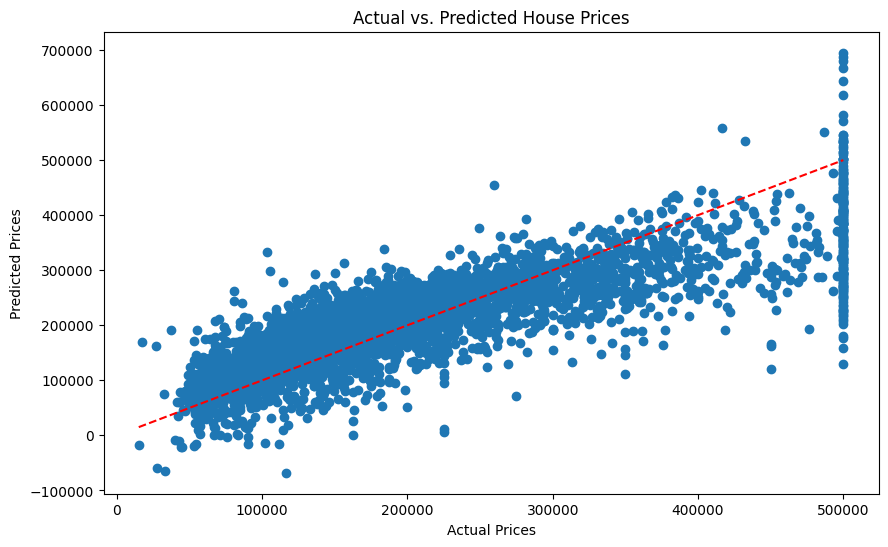

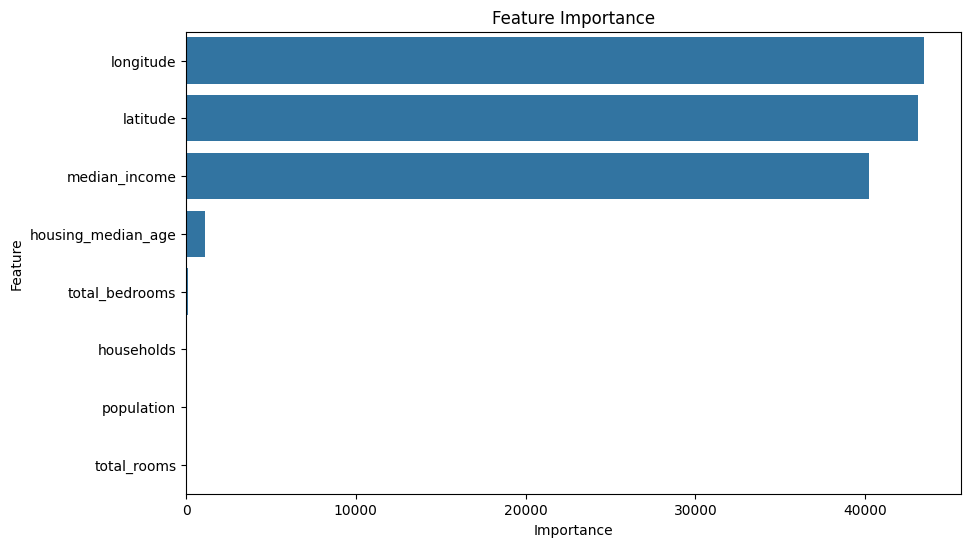

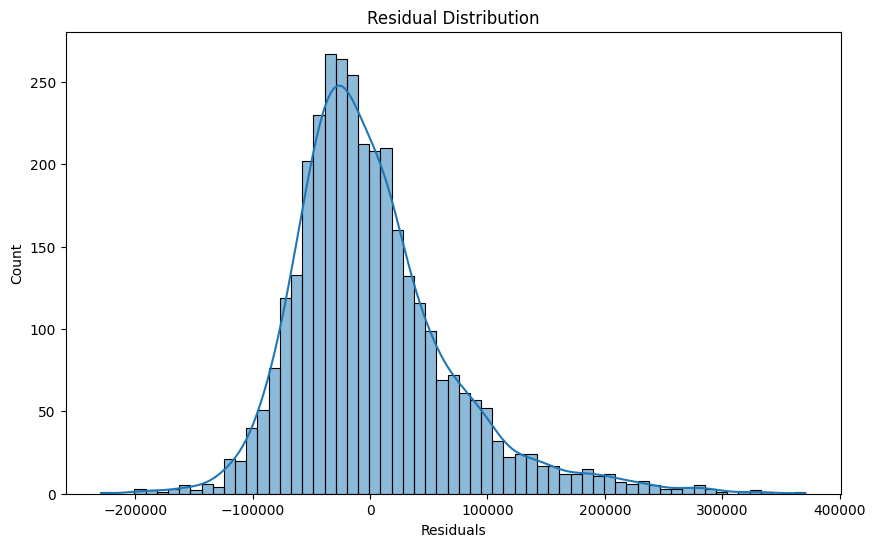

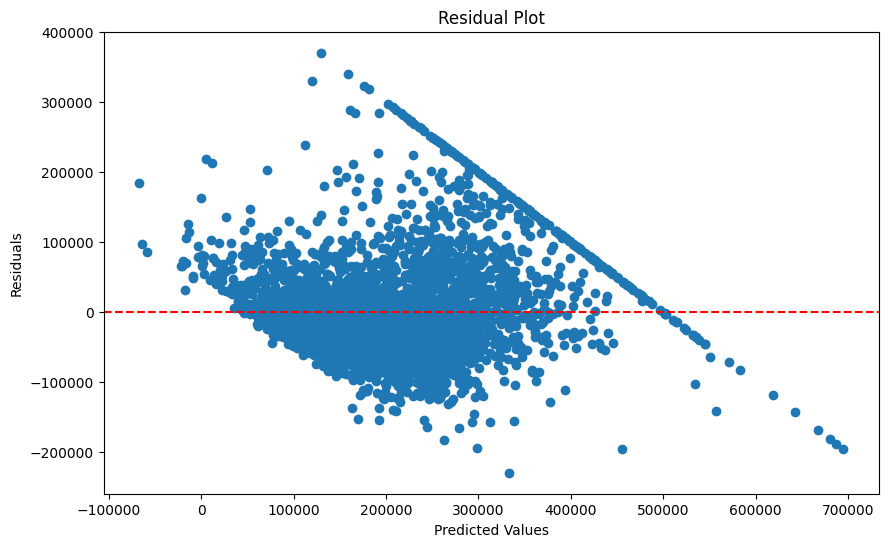

In [2]:
# prompt: 차트도 만들어 주세요

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 값과 예측 값 비교 차트
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 추가: 기준선
plt.show()

# 특성 중요도 시각화 (선형 회귀 모델의 경우 계수 활용)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model.coef_)})
importance = importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance")
plt.show()

# 잔차 분석
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)  # kde: 커널 밀도 추정
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()
